In [35]:
import matplotlib.pyplot as plt # plotting
import pandas as pd # data manipulation and analysis
import numpy as np # numerical computation
import pickle

### load the data from pickled files

In [97]:
f = open("partitioned_features.pickle","rb")
feat_all = pickle.load(f)
f.close()

f = open("partitioned_features_defective.pickle","rb")
feat_defective = pickle.load(f)
f.close()

f = open("partitioned_features_good.pickle","rb")
feat_good = pickle.load(f)
f.close()

### quality check 1 - check if all data in good is labeled w/ 0 and all data w/ defective is labeled w/ 1

They passed the test :) 

In [98]:
for test in feat_defective:
    for pt in test:
        label = pt[-2]
        if label==0:
            print("Error")
            print(pt)
        elif label!=1:
            print("Error")

In [99]:
for test in feat_good:
    for pt in test:
        label = pt[-2]
        if label==1:
            print("Error")
            print(pt)
        elif label!=0:
            print("Error")

## Calculate all the means and statndard deviation

In [114]:
def the_means(feature_list):
    feat_means = []
    for i in feature_list:
        transposed = np.transpose(i)
        means = []
        for j in transposed:
            means.append(np.mean(j))
        feat_means.append(means)
    return feat_means

def the_stds(feature_list):
    feat_stds = []
    for i in feature_list:
        transposed = np.transpose(i)
        stds = []
        for j in transposed:
            stds.append(np.std(j))
        feat_stds.append(stds)
    return feat_stds

def the_max(feature_list):
    feat_max = []
    for i in feature_list:
        transposed = np.transpose(i)
        maxes = []
        for j in transposed:
            maxes.append(max(j))
        feat_max.append(maxes)
    return feat_max

def the_min(feature_list):
    feat_min = []
    for i in feature_list:
        transposed = np.transpose(i)
        mins = []
        for j in transposed:
            mins.append(min(j))
        feat_min.append(mins)
        
def get_gradient(feature_list):# returns the gradient of everything
    feat_grad = []
    for i in feature_list:
        transposed = np.transpose(i)
        # find the gradient at each point
        gradients = []
        for j in range(len(transposed)):
            grad_feat = []
            for k in range(len(transposed[j])):
                if k>=1:
                    grad_feat.append(transposed[j][k]-transposed[j][k-1])
            gradients.append(grad_feat)
        feat_grad.append(np.transpose(gradients))
    return feat_grad
        
def gradient_mean_plus(feature_list):
    feat_grad = []
    for i in feature_list:
        transposed = np.transpose(i)
        # find the gradient at each point
        gradients = []
        for j in range(len(transposed)):
            grad_feat = []
            for k in range(len(transposed[j])):
                if k>=1:
                    grad_feat.append(transposed[j][k]-transposed[j][k-1])
            gradients.append(grad_feat)
        feat_grad.append(np.transpose(gradients))
        #print(gradients[0])# trace
        
    # we want a gradient mean as a feature
    gradient_mean = the_means(feat_grad)
    
    # we want a list of say 15 gradients as features; here we assume there are 600 data points so we 
    # sample a gradient with a step size of 40 each time. We also assume the data has been normalised and that we can apply the 
    
    return gradient_mean

def 


feat_all_grad_means = gradient_mean(feat_all)

feat_all_means = the_means(feat_all)

"""
feat_all_means = the_means(feat_all)
feat_defective_means = the_means(feat_defective)
feat_good_means = the_means(feat_good)

feat_all_stds = the_stds(feat_all)
feat_defective_stds = the_means(feat_defective)
feat_good_stds = the_means(feat_good)

feat_all_max = the_max(feat_all)
feat_defective_max = the_max(feat_defective)
feat_good_max = the_max(feat_good)

feat_all_min = the_min(feat_all)
feat_defective_min = the_min(feat_defective)
feat_good_min = the_min(feat_defective)"""

'\nfeat_all_means = the_means(feat_all)\nfeat_defective_means = the_means(feat_defective)\nfeat_good_means = the_means(feat_good)\n\nfeat_all_stds = the_stds(feat_all)\nfeat_defective_stds = the_means(feat_defective)\nfeat_good_stds = the_means(feat_good)\n\nfeat_all_max = the_max(feat_all)\nfeat_defective_max = the_max(feat_defective)\nfeat_good_max = the_max(feat_good)\n\nfeat_all_min = the_min(feat_all)\nfeat_defective_min = the_min(feat_defective)\nfeat_good_min = the_min(feat_defective)'

In [119]:
[1,2]+[2,3]

[1, 2, 2, 3]

In [118]:
len(feat_all_grad_means)
#len(feat_all_means[0])

470

In [117]:
print(feat_all_grad_means[100])

[0.1993027064790257, -0.15188903924221922, -0.0005368431028416783, 0.017021800288227334, 0.01649188092016238, 0.02187024271989175, 0.0205576589986468, -0.0038918296820027068, -0.005321348289580515, -0.00011948579161028933, 0.0, 0.0]


In [112]:
print(len(feat_all_stds))
print(len(feat_defective_stds))
print(len(feat_good_stds))
feat_all_stds[0]

470
166
304


[156.37173345474025,
 62.32149366866028,
 1.232999140272644,
 5.025814823312249,
 5.389884403292671,
 14.612273862705484,
 36.434891883195824,
 3.09237379284704,
 2.266874622624454,
 19.058937700983474,
 0.0,
 0.0]

## Find the gradient of each feature
We discretize the data, taking the data from Viet's one minuit data I will find the gradient at 15 equidistant points and use these as 15 features.

## Plot them

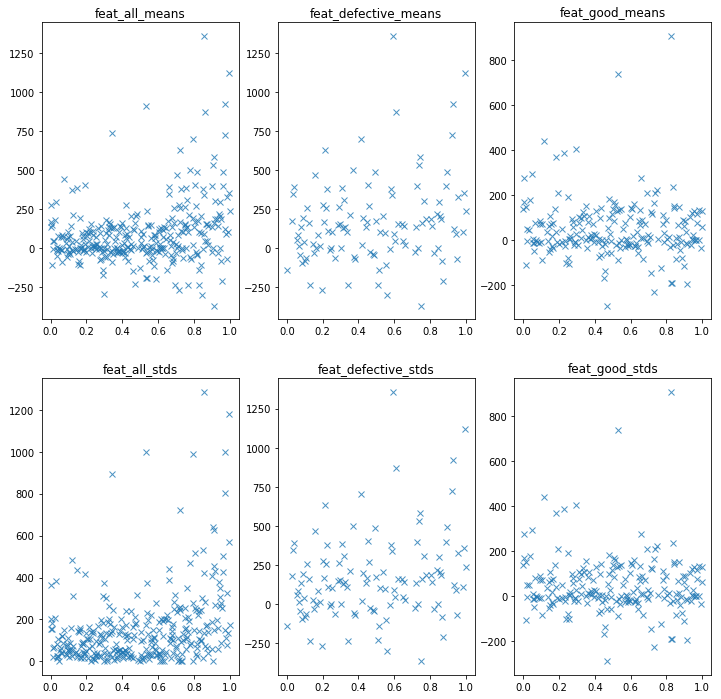

In [76]:
# input is a feature index

def disp_feature_mean_etc(i):
    fam = [j[i] for j in feat_all_means]
    fas = [j[i] for j in feat_all_stds]
    fdm = [j[i] for j in feat_defective_means]
    fgm = [j[i] for j in feat_good_means]
    fds = [j[i] for j in feat_defective_stds]
    fgs = [j[i] for j in feat_good_stds]
    
    plt.figure(figsize=(12,12))

    t=0.8

    plt.subplot(431)
    plt.plot(np.linspace(0,1,len(fam)), fam,"x",alpha=t)
    plt.title("feat_all_means")

    plt.subplot(432)
    plt.plot(np.linspace(0,1,len(fdm)), fdm,"x",alpha=t)
    plt.title("feat_defective_means")


    plt.subplot(433)
    plt.plot(np.linspace(0,1,len(fgm)), fgm,"x",alpha=t)
    plt.title("feat_good_means")



    plt.subplot(434)
    plt.plot(np.linspace(0,1,len(fas)), fas,"x",alpha=t)
    plt.title("feat_all_stds")


    plt.subplot(435)
    plt.plot(np.linspace(0,1,len(fds)), fds,"x",alpha=t)
    plt.title("feat_defective_stds")


    plt.subplot(436)
    plt.plot(np.linspace(0,1,len(fgs)), fgs,"x",alpha=t)
    plt.title("feat_good_stds")

    plt.show()
    
    
disp_feature_mean_etc(0)